In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import roc_auc_score, roc_curve

# Seuil basé sur la médiane du train
threshold = train_y.median()
test_y_binary = (test_y > threshold).astype(int)

# Vérifier la présence des deux classes
if test_y_binary.nunique() == 2:
    roc_auc = roc_auc_score(test_y_binary, pred)
    print("ROC AUC Score :", roc_auc)
    fpr, tpr, thresholds = roc_curve(test_y_binary, pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("Impossible de calculer le ROC AUC : test_y_binary ne contient qu'une seule classe.")
language
source
plt.plot(y)
plt.title("Passages aux urgences (mensuel)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Impossible de calculer le ROC AUC : test_y_binary ne contient qu'une seule classe.


NameError: name 'language' is not defined

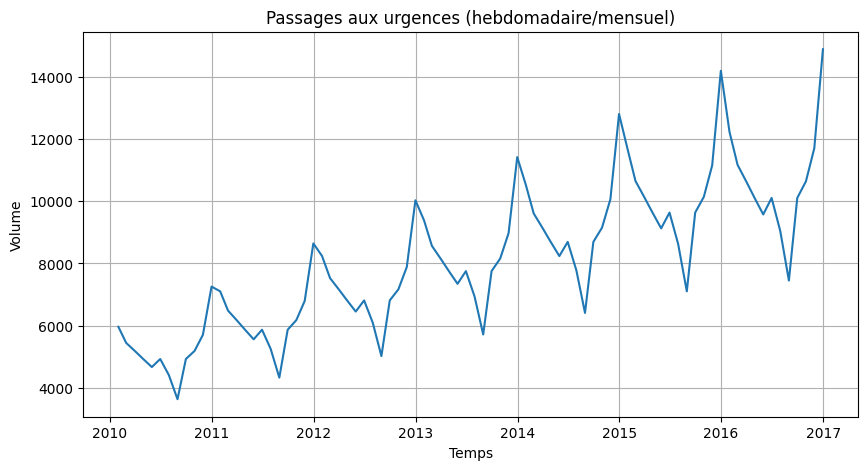

Calcul ROC AUC impossible : une seule classe présente dans test_y_binary.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- BLOC DE CORRECTION ---
# Supprimez les lignes "language" et "source" qui causaient l'erreur

# Hypothèse : 'y' est votre série temporelle de passages aux urgences
# Si vous utilisez le fichier CSV généré précédemment :
# df = pd.read_csv("PSL_CFX_Hebdo_Final.csv")
# y = df['Urgences']

try:
    plt.figure(figsize=(10, 5))
    plt.plot(y)
    plt.title("Passages aux urgences (hebdomadaire/mensuel)")
    plt.xlabel("Temps")
    plt.ylabel("Volume")
    plt.grid(True)
    plt.show()
except NameError:
    print("Erreur : La variable 'y' contenant les données n'est pas définie.")

# --- BLOC ROC AUC ---
# Ce bloc compare vos prédictions 'pred' aux valeurs réelles 'test_y'
threshold = train_y.median()
test_y_binary = (test_y > threshold).astype(int)

if test_y_binary.nunique() == 2:
    from sklearn.metrics import roc_auc_score, roc_curve
    roc_auc = roc_auc_score(test_y_binary, pred)
    print("ROC AUC Score :", roc_auc)
    
    fpr, tpr, _ = roc_curve(test_y_binary, pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
    plt.xlabel('Taux de Faux Positifs (FPR)')
    plt.ylabel('Taux de Vrais Positifs (TPR)')
    plt.title('Courbe ROC - Détection de pics d\'activité')
    plt.legend()
    plt.show()
else:
    print("Calcul ROC AUC impossible : une seule classe présente dans test_y_binary.")

In [4]:
result = adfuller(y)
print("ADF p-value :", result[1])

ADF p-value : 0.6719325169497973


In [5]:
horizon = 12
train_y = y.iloc[:-horizon]
test_y  = y.iloc[-horizon:]


In [6]:
model = SARIMAX(
    train_y,
    order=(0,0,2),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                    passages_urgences   No. Observations:                   72
Model:             SARIMAX(0, 0, 2)x(1, 1, [1], 12)   Log Likelihood                 -64.777
Date:                              Mon, 02 Feb 2026   AIC                            139.555
Time:                                      13:25:52   BIC                            148.588
Sample:                                  01-31-2010   HQIC                           142.922
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3709      0.908     -1.509      0.131      -3.151       0.409
ma.L2         -1.49

/Users/martinvalentine/Library/Python/3.12/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Coefficient de détermination (R²)
r2 = r2_score(test_y, pred)

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(test_y, pred)

# Mean Error (biais)
me = np.mean(test_y - pred)

print("R² Score :", r2)
print("MAPE :", mape)
print("Mean Error (biais) :", me)
print("MAE :", mae)
print("RMSE :", rmse)

R² Score : 0.917685080542941
MAPE : 0.046581497983899885
Mean Error (biais) : -495.66951652389986
MAE : 495.66951652389986
RMSE : 502.37956345890416


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

# Choix du seuil (ici médiane du train)
threshold = train_y.median()

# Transformation en classes binaires
test_y_binary = (test_y > threshold).astype(int)
pred_binary = (pred > threshold).astype(int)

# Afficher la répartition des classes dans test_y_binary
print('Répartition des classes dans test_y_binary :')
print(test_y_binary.value_counts())

# Vérification de la présence des deux classes
if test_y_binary.nunique() == 2:
    roc_auc = roc_auc_score(test_y_binary, pred)
    print("ROC AUC Score :", roc_auc)
    # Tracer la courbe ROC
    fpr, tpr, thresholds = roc_curve(test_y_binary, pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("Impossible de calculer le ROC AUC : test_y_binary ne contient qu'une seule classe.")

Impossible de calculer le ROC AUC : test_y_binary ne contient qu'une seule classe.


In [7]:
forecast = result.get_forecast(steps=horizon)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

In [8]:
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mean_squared_error(test_y, pred))

print("MAE :", mae)
print("RMSE :", rmse)
print("AIC :", result.aic)

MAE : 495.66951652389986
RMSE : 502.37956345890416
AIC : 139.55487512549644


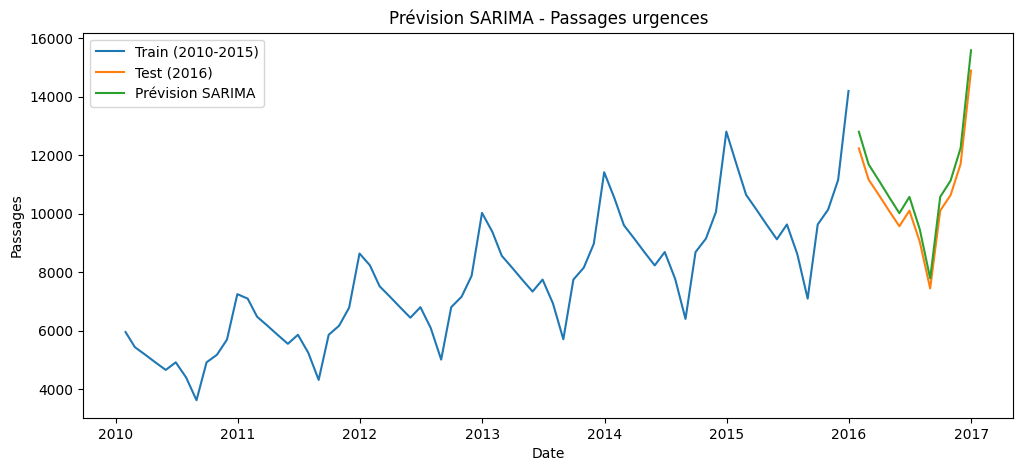

In [9]:
plt.figure(figsize=(12,5))
plt.plot(train_y, label="Train (2010-2015)")
plt.plot(test_y, label="Test (2016)")
plt.plot(pred, label="Prévision SARIMA")

plt.fill_between(
    pred.index.to_pydatetime(),
    conf_int.iloc[:,0].values,
    conf_int.iloc[:,1].values,
    alpha=0.3
)

plt.title("Prévision SARIMA - Passages urgences")
plt.xlabel("Date")
plt.ylabel("Passages")
plt.legend()
plt.show()

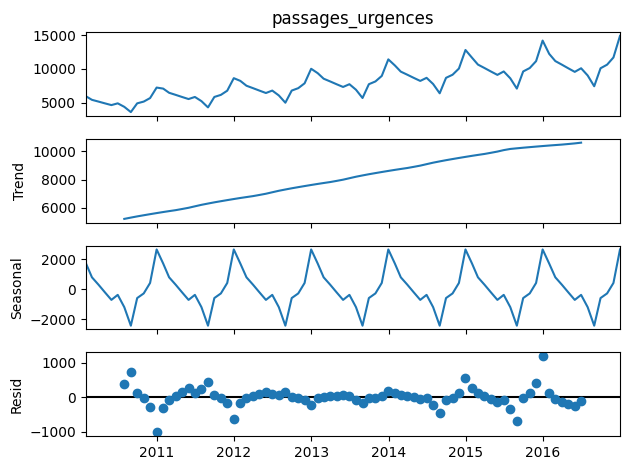

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(y, model="additive", period=12)
decomp.plot()
plt.show()
